# Import packages

In [83]:
import numpy as np 
import pandas as pd 
import warnings, sklearn

import matplotlib.pyplot as plt
import seaborn as sns

import pylab

import ast
# to get the exact format of the data
import nltk
%matplotlib inline

warnings.filterwarnings('ignore')

from nltk.stem import PorterStemmer # to stem 
from sklearn.feature_extraction.text import CountVectorizer # to vectorize

# to find out the cosine distance as the dimensionality is very high cosine_similarity we are importing 
#cosine_distances is the inverse of cosine_similarity
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity 

In [84]:
import pickle

# Set the note book cosmetic part

In [85]:
from pylab import rcParams
pd.set_option.max_columns=300
pd.set_option.max_rows =300
rcParams["figure.figsize"]=6,4
rcParams["figure.edgecolor"]='b'

# Read and understand the data

In [86]:
# data set link : https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv
# there are 2 data sets
movie= pd.read_csv('tmdb_5000_movies.csv')
cr=pd.read_csv('tmdb_5000_credits.csv')

In [87]:
# check movie
movie.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [88]:
# check cr
cr.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [89]:
# check shapes
movie.shape, cr.shape

((4803, 20), (4803, 4))

In [90]:
# merging both df depend on id
inp0=pd.merge(left=movie, right=cr, left_on='id', right_on='movie_id',how="inner")

In [91]:
# check shape
inp0.shape

(4803, 24)

In [92]:
# check info
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [93]:
# get the numeric columns 
num_col=inp0.select_dtypes(include=['number']).columns
num_col

Index(['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'movie_id'],
      dtype='object')

In [94]:
# get the object columns
obj_col = inp0.select_dtypes(exclude=["number"]).columns
obj_col

Index(['genres', 'homepage', 'keywords', 'original_language', 'original_title',
       'overview', 'production_companies', 'production_countries',
       'release_date', 'spoken_languages', 'status', 'tagline', 'title_x',
       'title_y', 'cast', 'crew'],
      dtype='object')

# Understand features

In [95]:
inp0.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [96]:
inp0.keywords[0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [97]:
inp0.overview[0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [98]:
inp0.production_companies[0]

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [99]:
inp0.production_countries.value_counts()

[{"iso_3166_1": "US", "name": "United States of America"}]                                                                                                                                     2977
[{"iso_3166_1": "GB", "name": "United Kingdom"}, {"iso_3166_1": "US", "name": "United States of America"}]                                                                                      181
[]                                                                                                                                                                                              174
[{"iso_3166_1": "GB", "name": "United Kingdom"}]                                                                                                                                                131
[{"iso_3166_1": "DE", "name": "Germany"}, {"iso_3166_1": "US", "name": "United States of America"}]                                                                                             119
                    

In [100]:
# change the release_date colomn to time satam
inp0.release_date=pd.to_datetime(inp0.release_date)

In [101]:
# check the max and min dates
print(inp0.release_date.min())
print(inp0.release_date.max())

1916-09-04 00:00:00
2017-02-03 00:00:00


In [102]:
# check how many movies are not released
inp0[inp0.status !="Released"].shape

(8, 24)

In [103]:
inp0[inp0.status !="Released"].status

2906    Post Production
4169    Post Production
4178    Post Production
4401            Rumored
4453            Rumored
4508            Rumored
4662            Rumored
4754            Rumored
Name: status, dtype: object

In [104]:
# removing other than released movies
inp0=inp0[~(inp0.status !="Released")]

In [105]:
inp0.vote_average.mode()

0    6.0
1    6.5
Name: vote_average, dtype: float64

In [106]:
inp0.crew[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [107]:
# extract out the important columns

inp_col=["genres","movie_id", "keywords", "original_language","popularity","overview", "release_date", "title_x",
        "vote_average",  "vote_count","cast", "crew"]
# and reshape the df
inp0=inp0[inp_col]
inp0.shape

(4795, 12)

# Data Cleaning

In [108]:
# check the nan 
inp0.isna().sum()

genres               0
movie_id             0
keywords             0
original_language    0
popularity           0
overview             3
release_date         1
title_x              0
vote_average         0
vote_count           0
cast                 0
crew                 0
dtype: int64

In [109]:
# droping blanks as the numbers are very less
inp0.dropna(inplace=True)

In [110]:
# checking dublicated values
inp0.duplicated().sum()

0

<AxesSubplot:>

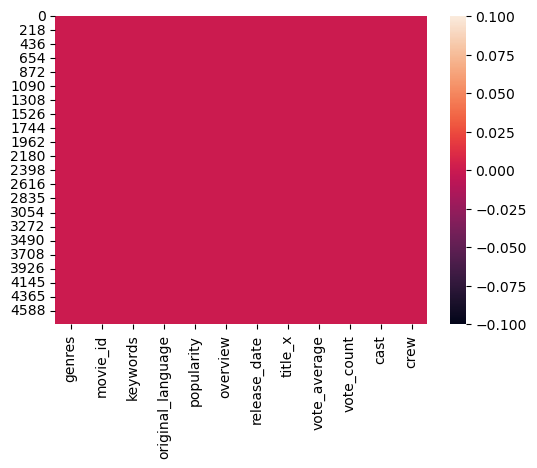

In [111]:
# check again the blanks
sns.heatmap(inp0.isna())

In [112]:
# check the shape again
inp0.shape

(4791, 12)

# Feature Engineering

In [113]:
inp0.genres[0] # it is a list of dict inside a string

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [114]:
# usage of ast
a="[{'a':123}]"
print(f"Data type of before using ast {type(a)}")

b=type(ast.literal_eval("[{'a':123}]"))
print(f"Data type of after using ast {type(b)}")

Data type of before using ast <class 'str'>
Data type of after using ast <class 'type'>


In [115]:
# make a function to extract out the name of generes

def extract(obj):
    name=[]
    for i in ast.literal_eval(obj):
        name.append(i["name"])
    return name
   

In [116]:
# lets check the function
text=inp0.genres[0] #extract one generes
extract(text)

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [117]:
inp0.genres=inp0.genres.apply(extract) # transform the generes

In [118]:
inp0.keywords=inp0.keywords.apply(extract) # transorm keywords with extract function

In [119]:
inp0.cast[0]

# it has all the cast name we need top 3 names 

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [120]:
# create one function to extract first 3 vaues of the dict from a dict of list

def extract_3(obj):
    name=[]
    count_x=0
    for i in ast.literal_eval(obj):
        if count_x!=3:
            name.append(i["name"])
            count_x+=1
        else:
            break
    return name

In [121]:
inp0.cast=inp0.cast.apply(extract_3) # get first 3 casts and transform the cast feature

In [122]:
inp0.crew[0]
# in dict of list there in if the job == director then the dictonary says director details
# we need to exract the name of the director

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [123]:
# create the function to get the director name
def director(obj):
    direct=[]
    for i in ast.literal_eval(obj):
        if i['job']=="Director":
            direct.append(i['name'])
    return direct

In [124]:
# check the function
director(inp0.crew[0]) # it is matching

['James Cameron']

In [125]:
# apply the function and create a new feature as director from crew
inp0["director"]=inp0.crew.apply(director) 

In [126]:
# drop crew
inp0.drop('crew', axis=1, inplace =True) 

In [127]:
# check the data
inp0.head(1)

,genres,movie_id,keywords,original_language,popularity,overview,release_date,title_x,vote_average,vote_count,cast,director
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,150.437577,"In the 22nd century, a paraplegic Marine is di...",2009-12-10,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]


<AxesSubplot:xlabel='popularity', ylabel='Density'>

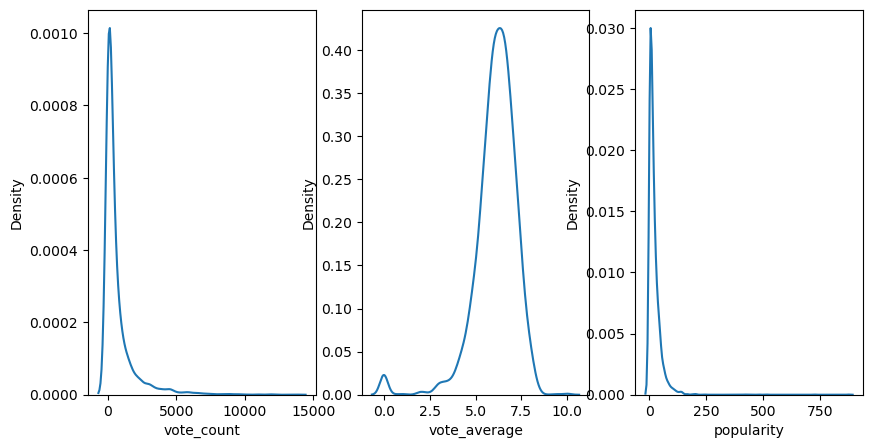

In [128]:
# Plot the numerical col to understand the data skewness
plt.figure(figsize=[10,5])
plt.subplot(1,3,1)

sns.kdeplot(inp0.vote_count)
plt.subplot(1,3,2)

sns.kdeplot(inp0.vote_average)
plt.subplot(1,3,3)
sns.kdeplot(inp0.popularity)

<AxesSubplot:>

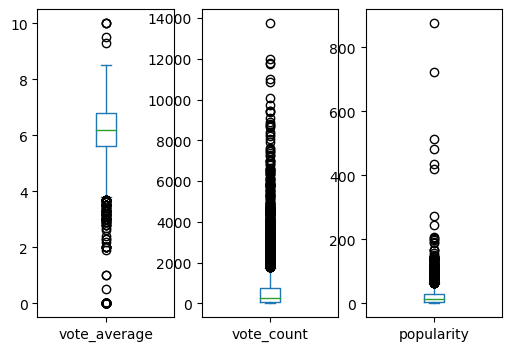

In [129]:
plt.subplot(1,3,1)
inp0["vote_average"].plot.box()
plt.subplot(1,3,2)
inp0["vote_count"].plot.box()
plt.subplot(1,3,3)
inp0["popularity"].plot.box()

In [130]:
# tranform the overview from str to list
inp0.overview=inp0.overview.apply(lambda x: x.split())

In [131]:
inp0.head(1)

,genres,movie_id,keywords,original_language,popularity,overview,release_date,title_x,vote_average,vote_count,cast,director
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,150.437577,"[In, the, 22nd, century,, a, paraplegic, Marin...",2009-12-10,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]


In [132]:
# remove the spaces in between 2 words from below features to
# over come the confusion


inp0.cast=inp0.cast.apply(lambda x:[i.replace(" ","") for i in x])
inp0.genres=inp0.genres.apply(lambda x:[i.replace(" ","") for i in x])
inp0.keywords=inp0.keywords.apply(lambda x:[i.replace(" ","") for i in x])
inp0.director=inp0.director.apply(lambda x:[i.replace(" ","") for i in x])

In [133]:
# concatenate overview, genres, keywords, cast and director in tag feature
inp0["tag"]=inp0.overview+inp0.genres+inp0.keywords+inp0.cast+inp0.director

In [134]:
# check the data
inp0.head(1)

,genres,movie_id,keywords,original_language,popularity,overview,release_date,title_x,vote_average,vote_count,cast,director,tag
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",en,150.437577,"[In, the, 22nd, century,, a, paraplegic, Marin...",2009-12-10,Avatar,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."


In [135]:
# covert the tag feature's value to string
inp0.tag=inp0.tag.apply(lambda x: " ".join(x))

In [136]:
inp0.tag[0] # check the same

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [137]:
# create a new df with only important features
inp1=inp0[["movie_id", "title_x","tag" , "vote_average"]]

In [138]:
inp1.head() # check the data
inp1.rename(columns={"title_x":"title"}, inplace=True) # Change the name of title_x col to title_x
inp1.head()

,movie_id,title,tag,vote_average
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",7.2
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",6.9
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,6.3
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,7.6
4,49529,John Carter,"John Carter is a war-weary, former military ca...",6.1


In [139]:
inp1.tag=inp1.tag.apply(lambda x: x.lower()) # transform all the letter lowercase, tag 

In [140]:
stm = PorterStemmer() # innititate stemmer

In [141]:
# make the function to stemm each words 
def Stem_x(text):
    l=[]
    for i in text.split():
        x= stm.stem(i)
        l.append(x)
    return " ".join(l)
# to remove the dublicity of words 

In [142]:
# check the function
Stem_x("loved lovee loving")

'love love love'

In [143]:
inp1.tag=inp1.tag.apply(Stem_x) # stem the tag feature

In [144]:
inp1.tag[0] # check

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [145]:
# innitiate the CountVectorizer
# removed the stop words like "a, an, am, is, are" 
# get 5000 vectors
vectorizer= CountVectorizer(stop_words="english", max_features=5000)

In [146]:
# vectorize the tag feature
vect=vectorizer.fit_transform(inp1.tag).toarray()

In [147]:
# see the words
vectorizer.get_feature_names()

['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17th',
 '18',
 '18th',
 '18thcenturi',
 '19',
 '1910',
 '1920',
 '1930',
 '1940',
 '1944',
 '1950',
 '1950s',
 '1960',
 '1960s',
 '1970',
 '1970s',
 '1974',
 '1976',
 '1980',
 '1985',
 '1990',
 '19th',
 '19thcenturi',
 '20',
 '200',
 '2003',
 '2009',
 '20th',
 '21st',
 '23',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '70',
 '80',
 'aaron',
 'aaroneckhart',
 'abandon',
 'abduct',
 'abigailbreslin',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abus',
 'academ',
 'academi',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accomplish',
 'account',
 'accus',
 'ace',
 'achiev',
 'acquaint',
 'act',
 'action',
 'actionhero',
 'activ',
 'activist',
 'activities',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adamsandl',
 'adamshankman',
 'adapt',
 'add',
 'addict',
 'adjust',
 'admir',
 'admit',
 'adolesc',
 'adopt',
 'ador',
 'adrienbrodi',
 'adult',
 'adultanim',
 '

In [148]:
# find out the distance of each movies from each others
# Higher the similarity higher the chance of getting recomendation
similarity =cosine_similarity(vect)
similarity

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

In [149]:
# check the shape
similarity.shape

(4791, 4791)

In [150]:
similarity[0]
# it is showing Avatar movie has higher similarity with the same movie at index 0, 
# then avatar and next after it has similarity 0.08346223 .........  

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

In [151]:
dis= cosine_distances(vect)
dis[0]

array([0.        , 0.91653777, 0.9139691 , ..., 0.95500787, 1.        ,
       1.        ])

## In this 4791 movies became one one vector. And in distance the one array is representing one movie and its distance from other movies in values.

# Distance is ulta of Similarity

In [152]:
# how to find the index of a movie
inp1[inp1.title=="Avatar"].index[0]

0

In [153]:
# sorting movies over similarity in such a way that the indexes are kept
sorted(list(enumerate(similarity[0])), reverse=True, key=lambda x: x[1])[1:6]

[(1213, 0.28676966733820225),
 (2403, 0.26901379342448517),
 (3722, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.25038669783359574)]

In [178]:
# Function to get the recomendated movie
def recomendation(movie_name):
    movie_index = inp1[inp1.title==movie_name].index[0] # get the index of the movie
    disstance= similarity[movie_index] # get the distances from a moive index to other movie indexes
    
    # short the distance and keep the indexes as it is along with extraction of 5 high simmilar movies
    movie_list =sorted(list(enumerate(disstance)), reverse=True, key=lambda x: x[1])[1:6]
    
    # get the movie name out of from their index
    
    recomended_index =[]
    r=[]
    
    for i in movie_list:
        recomended_index.append(inp1.iloc[i[0]].title)
        r.append(inp1.iloc[i[0]].vote_average)
        df=pd.DataFrame()
        df["Recommendation"]=recomended_index
        df["Ratting"]=r
        
        
        
    return df

In [179]:
try:
    recomendation("Avatar")
except:
    print("No Movie in the lsit")

In [180]:
recomendation("Avatar")

,Recommendation,Ratting
0,Aliens vs Predator: Requiem,4.9
1,Aliens,7.7
2,Falcon Rising,5.5
3,Independence Day,6.7
4,Titan A.E.,6.3


# Making pickel files

In [74]:
pickle.dump(inp1.to_dict(), open('mdict.pickle', 'wb'))

In [75]:
d=inp1.to_dict()

In [76]:
pickle.dump(similarity,open('similarity.pickle','wb'))